In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Import common python libraries
import scipy.io as sio
import numpy as np
import pandas as pd
import os

# sklearn imports for SVM
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC, SVC

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

# ignoring Numpy error
np.seterr(divide = 'ignore') 

# Where to save the figures
EXERCISE_ROOT_DIR = "."
IMAGES_PATH = os.path.join(EXERCISE_ROOT_DIR, "images")

In [2]:
# The function allows images to be saved
def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [3]:
# load the preprocessed iris dataset
dataset = pd.read_csv('datasets/iris_process.data',
                      delimiter=',',
                      header=None, 
                      names=['sepal length', 'sepal width', 'petal length', 'petal width','class'])

print('\nNumber of records:',len(dataset))
print('\nclass domain:', dataset['class'].unique())
print('\n\n',dataset.head())


Number of records: 150

class domain: [0 1]


    sepal length  sepal width  petal length  petal width  class
0           5.1          3.5           1.4          0.2      0
1           4.9          3.0           1.4          0.2      0
2           4.7          3.2           1.3          0.2      0
3           4.6          3.1           1.5          0.2      0
4           5.0          3.6           1.4          0.2      0


In [4]:
X = pd.DataFrame(dataset,columns=['sepal length','sepal width']).values
y = dataset['class'].values
print('The shape of X:',X.shape)
print('The shape of y:',y.shape)

The shape of X: (150, 2)
The shape of y: (150,)


In [5]:
def plot_dataset(X,y):
    plt.scatter(X[y == 0, 0],X[y == 0, 1],
                s=50, c='lightgreen',
                marker='o', edgecolor='black',label='class 1')
    plt.scatter(X[y == 1, 0],X[y == 1, 1],
                s=50, c='orange',
                marker='v', edgecolor='black',
                label='class 2')
    plt.tight_layout()
    plt.xlabel("sepal length", fontsize=14)
    plt.ylabel("sepal width", fontsize=14)

Saving figure svm_training_data


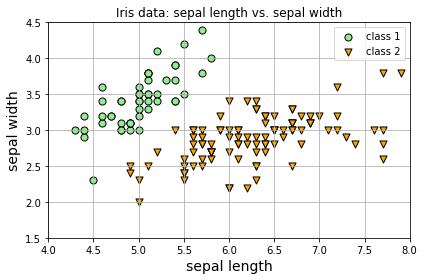

In [6]:
plt.figure(1)
plt.title('Iris data: sepal length vs. sepal width')
plot_dataset(X,y)
plt.grid(True)
plt.axis([4.0,8.0,1.5,4.5])
plt.legend()
save_fig("svm_training_data")
plt.show()

In [7]:
C = 20.0  # SVM regularization parameter
svm_model = SVC(kernel="linear", C=C) # SVM Classifier model
svm_model = svm_model.fit(X, y)

In [8]:
def classify(Ytest):
    if Ytest==0:
        return "class 1"
    elif Ytest==1:
        return "class 2"

In [9]:
Xtest = np.array([[6.75,4.25]])
Ytest = svm_model.predict(Xtest)
print("\nPrediction:",classify(Ytest[0]))


Prediction: class 2


In [10]:
def plot_decision_boundary(model,X,y, ax= None):
    ax = ax or plt.gca()
    w = model.coef_[0];
    b = model.intercept_[0];
    
    # At the decision boundary, w0*x0 + w1*x1 + b = 0
    # => x1 = -w0/w1 * x0 - b/w1
    xmin = X.min(); xmax = X.max();
    xp = np.linspace(xmin, xmax, 200)
    yp = -w[0]/w[1] * xp - b/w[1]
    
    margin = 1/w[1]
    gutter_up = yp + margin
    gutter_down = yp - margin
    
    svs = model.support_vectors_
    plt.scatter(svs[:, 0], svs[:, 1], s=180, linewidth=8, facecolors='#FFAAAA')
    plt.plot(xp, yp, "r-", linewidth=2)
    plt.plot(xp, gutter_up, "k--", linewidth=2)
    plt.plot(xp, gutter_down, "k--", linewidth=2)
    plot_dataset(X, y)

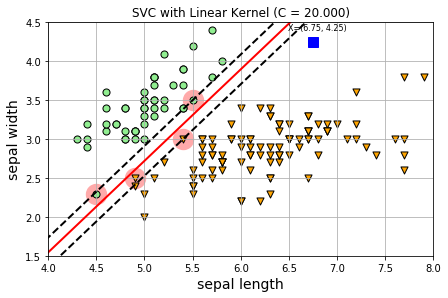

In [11]:
plt.figure(2)
plt.title('SVC with Linear Kernel (C = %.3f)'%(C))
plot_decision_boundary(svm_model,X,y)
plt.plot(6.75,4.25,'s', color='blue', markersize=10)
plt.annotate("X=(6.75, 4.25)",
             xy=(6.78, 4.25),
             xytext=(6.8, 4.4),
             ha="center",
             fontsize=8,
            )
plt.axis([4.0,8.0,1.5,4.5])
plt.grid(True)
#save_fig("svm_decision_boundary")
plt.show()